<a href="https://colab.research.google.com/github/madhuresh97/IntroToML/blob/main/MLAssignment1_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Madhuresh Gupta

NUID: 002198926

Adding all the necessary import statements that are required for the question below

# **Question 2:**
Mixture of 4 Gaussians

Initial Setup:

In [ ]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import linalg, random
import matplotlib.pyplot as plt

##Part A:
Minimum probability of error classification (0-1 loss, also referred to as Bayes Decision rule or MAP classifier)

1. Generate 10000 samples from this data distribution and keep track of the true labels of each
sample.

Below is the 4 classes which I have chosen:

In [ ]:
sample_info = pd.DataFrame(columns=['P','mu','cov'])
cp_1 = 0.3
# First Gaussian
mu_1  = [2, 1, 0]
cov_1 = [[2, 1,   0.5  ],
         [1,   1,   0.5  ],
         [0,   0, 2]]

dist_1 = {'P':cp_1,'mu':mu_1,'cov':cov_1}
sample_info = sample_info.append(dist_1,ignore_index=True)

cp_2 = 0.3
# Second Guassian
mu_2  = [1,2,1]
cov_2 = [[1,   2,   0  ],
         [0,   0.5,   0.5  ],
         [2,   2, 1  ]]
dist_2 = {'P':cp_2,'mu':mu_2,'cov':cov_2}
sample_info = sample_info.append(dist_2,ignore_index=True)

cp_3 = 0.4
# Third Gaussian
mu_3a  = [1,2,2]
cov_3a = [[1,   0,   0.5  ],
          [2,   0.5,   2  ],
          [0.5,   1,   2]]
dist_3a = {'P':(cp_3/2),'mu':mu_3a,'cov':cov_3a}
sample_info = sample_info.append(dist_3a,ignore_index=True)
# Fourth Gaussian
mu_3b  = [1,1,2]
cov_3b = [[1,   2,   1  ],
          [0,   0,   0.5  ],
          [0,   2,   0  ]]
dist_3b = {'P':(cp_3/2),'mu':mu_3b,'cov':cov_3b}
sample_info = sample_info.append(dist_3b,ignore_index=True)

In [ ]:
rng = default_rng()
overall_size = 10000
size_1 = 0
size_2 = 0
size_3a = 0
size_3b = 0
for i in range(0, overall_size) :
    r = random.random()
    if(r < cp_1):
        size_1 = size_1 + 1
    elif(r < cp_1+cp_2):
        size_2 = size_2 + 1
    elif(r < cp_1+cp_2+(cp_3/2)):
        size_3a = size_3a + 1
    else:
        size_3b = size_3b + 1
samples_1 = rng.multivariate_normal(mean=mu_1, cov=cov_1, size=size_1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z'])
samples_1['True Class Label'] = 1
samples_2 = rng.multivariate_normal(mean=mu_2, cov=cov_2, size=size_2)
samples_2 = pd.DataFrame(samples_2, columns=['x','y','z'])
samples_2['True Class Label'] = 2
samples_3a = rng.multivariate_normal(mean=mu_3a, cov=cov_3a, size=size_3a)
samples_3a = pd.DataFrame(samples_3a, columns=['x','y','z'])
samples_3a['True Class Label'] = 3
samples_3b = rng.multivariate_normal(mean=mu_3b, cov=cov_3b, size=size_3b)
samples_3b = pd.DataFrame(samples_3a, columns=['x','y','z'])
samples_3b['True Class Label'] = 3
samples   = samples_1.append([samples_2, samples_3a, samples_3b])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: covariance is not positive-semidefinite.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: covariance is not positive-semidefinite.


Plotting the sample data

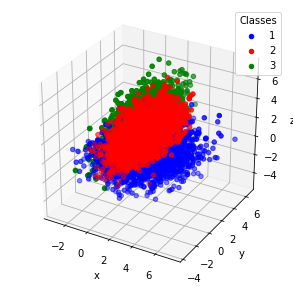

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection ="3d")
samples_1 = samples[samples['True Class Label']==1]
samples_2 = samples[samples['True Class Label']==2]
samples_3 = samples[samples['True Class Label']==3]

ax.scatter3D(samples_1['x'], samples_1['y'], samples_1['z'], label='1',c='b')
ax.scatter3D(samples_2['x'], samples_2['y'], samples_2['z'], label='2',c='r')
ax.scatter3D(samples_3['x'], samples_3['y'], samples_3['z'], label='3',c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(title='Classes')


In [ ]:
#setting up the samples
random.seed(2345)

# sample dimension
n = 3

# sample size
N = 10000

# class prior
class_prior = np.array([.2, .25, .25, .3])
NC = len(class_prior)

# class conditional pdf: gaussian
m = np.array([[0, 0, 0],
              [1, 0, 0],
              [1, 0, 1],
              [0, 0, 1]]).T

# eigenvalues gaussian covariance matrices
lam = np.array([.12, .11, .17, .14])

# sampling and labeling
X = np.zeros((n, N))
rnd = random.rand(N)

temp = np.insert(np.cumsum(class_prior), 0, 0)

y = np.zeros(N)
for i in range(NC):
    ind = (rnd >=temp[i]) & (rnd < temp[i+1])
    y[ind] = i + 1
    X[:, ind] = random.multivariate_normal(m[:, i], np.eye(n) * lam[i],
     np.sum(ind)).T

2. Implement 0-1 loss matrix classifier and estimate the confusion matrix.

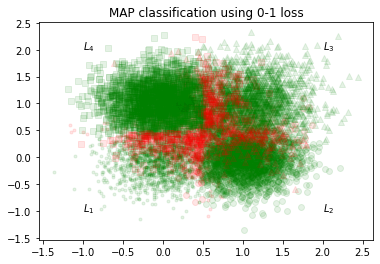

In [ ]:
#-------------------------------------------------------------------------
# Part A: minimum probability of error classification (MAP classification)
#-------------------------------------------------------------------------
decisionMAP = np.zeros(N)

for i in range(N):
    conditional = np.zeros(NC)
    
    for j in range(NC):
        conditional[j] = multivariate_normal.pdf(X[:, i], mean=m[:, j], 
                   cov=(np.eye(n) * lam[j]))
    
    decisionMAP[i] = np.argmax(conditional * class_prior) + 1

# confision matrix
CM = np.zeros((NC, NC))

for i in range(NC):
    for j in range(NC):
        CM[i, j] = ((decisionMAP == i+1) & (y == j+1)).sum() / (y == j+1).sum()

markers = ['.', 'o', '^', 's']

# plot samples and decisions
fig1 = plt.figure()
ax1 = fig1.gca()
for i in range(NC):
    ax1.scatter(X[0, ((decisionMAP==i+1) & (y==i+1))], 
              X[2, ((decisionMAP==i+1) & (y==i+1))], 
              marker=markers[i], c='green', alpha=.1)
    ax1.scatter(X[0, ((~(decisionMAP==i+1)) & (y==i+1))], 
              X[2, ((~(decisionMAP==i+1)) & (y==i+1))], 
              marker=markers[i], c='red', alpha=.1)
ax1.set_title('MAP classification using 0-1 loss')
plt.annotate(r'$L_1$', xy=(-1, -1))
plt.annotate(r'$L_2$', xy=(2, -1))
plt.annotate(r'$L_3$', xy=(2, 2))
plt.annotate(r'$L_4$', xy=(-1, 2))
plt.show()

##Part B:
Using ERM Classification

Expected loss and confusion matrix plot

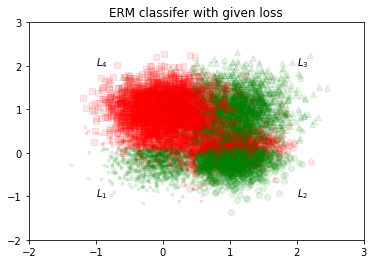

Expected loss:  0.2442


In [ ]:
# loss matrix
Loss = np.array([[0,   1,   10  , 10],
                 [1,   0,   10  , 10],
                 [1,   1,   0   , 0 ],
                 [1,   1,   0   , 0 ]])

loss_matrix_100 = np.array([[0,   1,  100  , 100],
                            [1,   0,  100  , 100],
                            [1,   1,  0    , 0  ],
                            [1,   1,  0    , 0  ]])

decisionERM = np.zeros(N)

for i in range(N):
    posterior = np.zeros((NC, 1))
    
    for j in range(NC):
        posterior[j] = multivariate_normal.pdf(X[:, i], 
                 mean=m[:, j], cov=(np.eye(n) * lam[j])) * class_prior[j]
    
    decisionERM[i] = np.argmin(Loss.dot(posterior)) + 1
markers = ['.', 'o', '^', 's']
# plot samples and decisions
fig2 = plt.figure()
ax2 = fig2.gca()
for i in range(NC):
    ax2.scatter(X[0, ((decisionERM==i+1) & (y==i+1))], 
              X[2, ((decisionERM==i+1) & (y==i+1))], 
              marker=markers[i], c='green', alpha=.1)
    ax2.scatter(X[0, ((~(decisionERM==i+1)) & (y==i+1))], 
              X[2, ((~(decisionERM==i+1)) & (y==i+1))], 
              marker=markers[i], c='red', alpha=.1)
ax2.set_xlim((-2, 3))
ax2.set_ylim((-2, 3))
ax2.set_title(r'ERM classifer with given loss')
plt.annotate(r'$L_1$', xy=(-1, -1))
plt.annotate(r'$L_2$', xy=(2, -1))
plt.annotate(r'$L_3$', xy=(2, 2))
plt.annotate(r'$L_4$', xy=(-1, 2))
plt.show()         
# expected loss
expect_loss = Loss[(decisionERM-1).astype(int), (y-1).astype(int)].sum() / N

print('Expected loss: ', expect_loss)